In [1]:
import autograd.numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from scipy.interpolate import interp1d
from scipy.special import gamma
from ADVI import ADVI

In [2]:
coordinates_1d = np.load('coordinates.npy')

In [3]:
from sklearn.decomposition import PCA

pca = PCA(12)

In [4]:
pca.fit(coordinates_1d)

PCA(n_components=12)

In [12]:
components = pca.components_
singular = pca.singular_values_
print(components.shape)

(12, 100)


In [20]:
X_reduction = pca.transform(coordinates_1d)
X_reconstructed = pca.inverse_transform(X_reduction)

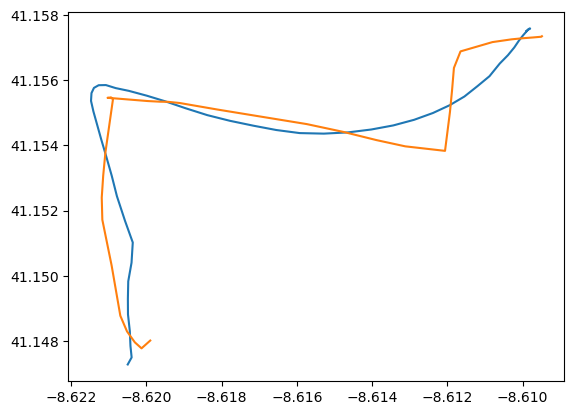

In [19]:
plt.plot(X_reduction[10][0:50],X_reduction[10][50:])
plt.plot(coordinates_1d[10][0:50],coordinates_1d[10][50:])

In [21]:
from sklearn.mixture import GaussianMixture

In [22]:
mixture = GaussianMixture(n_components=30)

In [26]:
mixture.fit(X_reduction[:100000])

GaussianMixture(n_components=30)

In [29]:
prediction = mixture.predict(X_reduction[:100000])

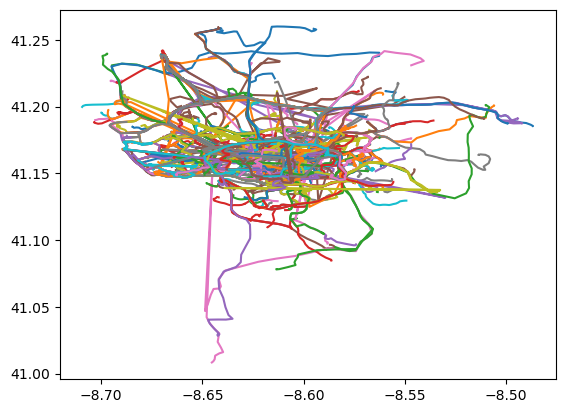

In [35]:
for i in range(1000):     
    plt.plot(coordinates_1d[i,:50],coordinates_1d[i,50:])

3 9
5 66
7 4
16 1
18 6
24 25
28 1
29 4


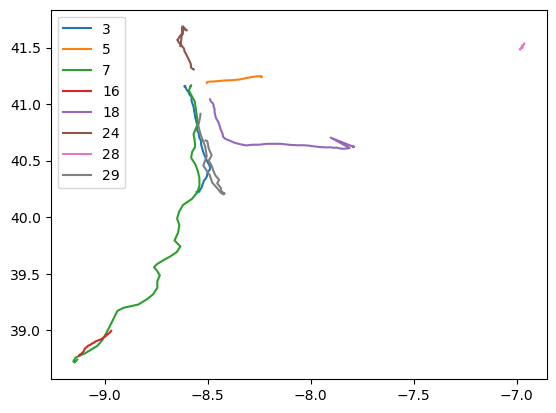

In [43]:

for i in range(30):
    subset = coordinates_1d[:100000][prediction==i]
    x_mean = subset[:,0:50].mean(axis=0)
    y_mean = subset[:,50:].mean(axis=0)
    if len(subset)<100:
        print(i,len(subset))
        plt.plot(x_mean,y_mean,label=str(i))
plt.legend()

0 3023
1 2591
2 3739
4 11300
6 1735
8 205
9 16707
10 1136
11 1029
12 2537
13 4066
14 4324
15 8714
17 5262
19 2312
20 8601
21 4409
22 3414
23 1638
25 10748
26 736
27 1658


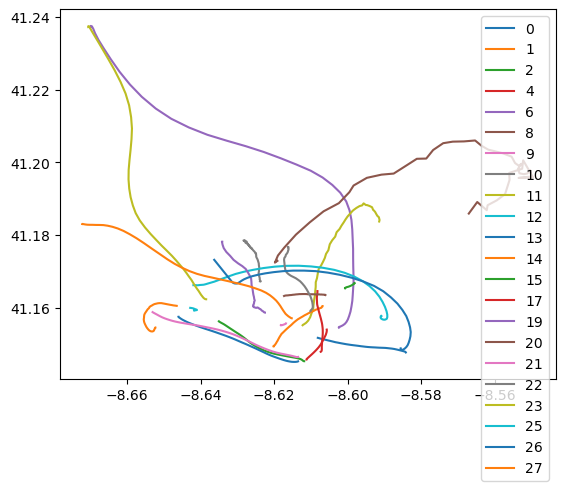

In [44]:

for i in range(30):
    subset = coordinates_1d[:100000][prediction==i]
    x_mean = subset[:,0:50].mean(axis=0)
    y_mean = subset[:,50:].mean(axis=0)
    if len(subset)>100:
        print(i,len(subset))
        plt.plot(x_mean,y_mean,label=str(i))
plt.legend()

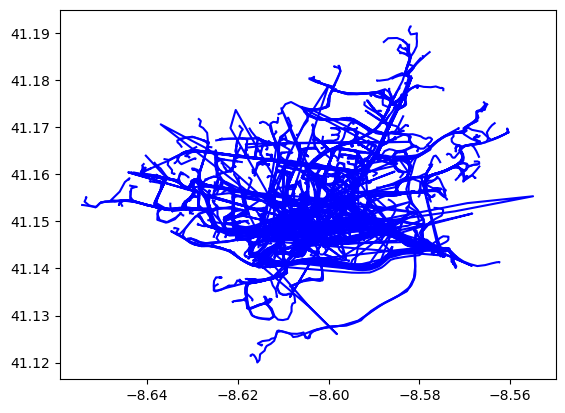

In [46]:
subset = coordinates_1d[:100000][prediction==0]
x_mean = subset[:,0:50]
y_mean = subset[:,50:]
for i in range(len(x_mean)):
    plt.plot(x_mean[i],y_mean[i],'b')
plt.show()

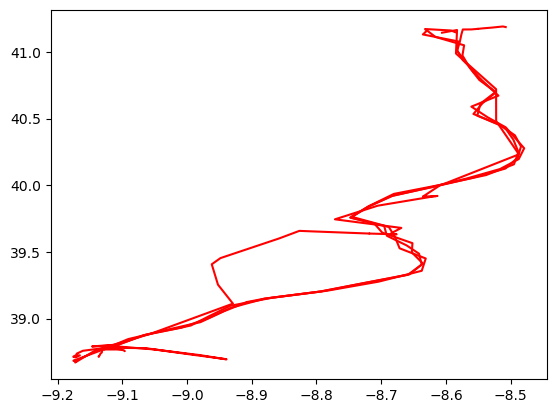

In [50]:
subset = coordinates_1d[:100000][prediction==7]
x_mean = subset[:,0:50]
y_mean = subset[:,50:]
for i in range(len(x_mean)):
    plt.plot(x_mean[i],y_mean[i],'r')
plt.show()